In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [1]:
!python test.py

0.8766086237423817


In [62]:
!cat ./patches/blur-2/labels.txt | head -n 5

img2_patch0 img1_patch0
img2_patch1 img1_patch1
img2_patch3 img1_patch3
img2_patch4 img1_patch4
img2_patch5 img1_patch5


In [20]:
from skimage.io import imread
from descriptor import distance_weighted, extract_for_patch

patch1_org = imread('./patches/blur-2/img2_patch5.png', as_grey=True)
patch1_ref = imread('./patches/blur-2/img1_patch5.png', as_grey=True)
patch1_wrong = imread('./patches/blur-2/img3_patch6.png', as_grey=True)

desc1_org = extract_for_patch(patch1_org)
desc1_ref = extract_for_patch(patch1_ref)
desc1_wrong = extract_for_patch(patch1_wrong)

[Exposure] Should be =0, is =0.06494395161139044
[Exposure] Should be =1, is =0.761956812775311
[Moments] Should be =0, is =0.25903374317457784
[Moments] Should be =1, is =0.7697588231982669
[Merged] Should be =0, is =0.1425798682366654
[Merged] Should be =1, is =0.7650776169444934


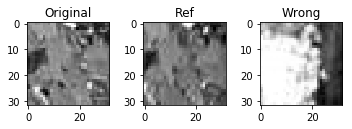

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(5, 2))
ax1.title.set_text('Original')
ax1.imshow(patch1_org, cmap='gray')
ax2.title.set_text('Ref')
ax2.imshow(patch1_ref, cmap='gray')
ax3.title.set_text('Wrong')
ax3.imshow(patch1_wrong, cmap='gray')
plt.tight_layout()

# Exposure
print('[Exposure] Should be =0, is ={}'.format(distance_weighted(desc1_org, desc1_ref, w_moments=0, w_exposure=1.0)))
print('[Exposure] Should be =1, is ={}'.format(distance_weighted(desc1_org, desc1_wrong, w_moments=0, w_exposure=1.0)))
# Hu Moments
print('[Moments] Should be =0, is ={}'.format(distance_weighted(desc1_org, desc1_ref, w_moments=1.0, w_exposure=0.0)))
print('[Moments] Should be =1, is ={}'.format(distance_weighted(desc1_org, desc1_wrong, w_moments=1.0, w_exposure=0.0)))
# Merged
print('[Merged] Should be =0, is ={}'.format(distance_weighted(desc1_org, desc1_ref, w_moments=0.4, w_exposure=0.6)))
print('[Merged] Should be =1, is ={}'.format(distance_weighted(desc1_org, desc1_wrong, w_moments=0.4, w_exposure=0.6)))